# Lab 8: K-means clustering for Iris flower dataset


### Unsupervised Learning

**Unsupervised learning** is a type of machine learning where models are trained on data without labeled outcomes. The algorithm identifies patterns, structures, or relationships in the data without prior knowledge of the correct results. It is commonly used for clustering, dimensionality reduction, and anomaly detection.

### Cluster Analysis

**Cluster analysis** refers to the task of grouping a set of objects in such a way that objects in the same group (called clusters) are more similar to each other than to those in other groups. It is a technique used in unsupervised learning to discover natural groupings in data.

### Partitional Cluster

**Partitional clustering** is a type of clustering where the dataset is divided into non-overlapping subsets (clusters) in such a way that each data point belongs to exactly one cluster. One of the most well-known partitional clustering algorithms is K-means clustering.

### K-Means Clustering

**K-means clustering** is a popular partitional clustering algorithm that aims to partition data into \( K \) clusters. It works by randomly initializing \( K \) centroids, then iteratively updating them by assigning each data point to the nearest centroid and recalculating the centroids based on the mean of the points assigned to each cluster. This process repeats until convergence.


## K means Clustering Algorithm

1. Assume n mean coordinate points for given clusters if k = n.
2. Use euclidean distance $ Dist [(x,y),(a,b)]= \sqrt{(x-a)^2 + (y-b)^2} $
   where (x,y) are the cooridnates points and (a,b) is one of the mean coordinates assumed. similarly compute euclidean distance for (x,y) with other n-1 mean coordinates.
3. Compare the distance of the coordinate (x,y) with each n mean cooridnates. Assign the coordinate (x,y) to the cluster with smallest distance to one of the mean coordinate point cluster.
4. Repeat step 2,3 for each coordinates points
5. Compute new mean coordinates of each cluster and repeat step 2,3,4 until there is no change in mean cordinates in previous and present iteration


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:

df = pd.read_csv('dataset/iris_flower.csv')
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Dataframe Columns Indexing and Slicing

In this example though there are 5 columns we can cluster the dataset based on only petal-length and petal-width so we need to perform indexing and slicing on the overall dataset to ectract just the petal-length and petal-width using X = array[:,[2, 3]]


In [3]:
array = df.values
X = array[:,[2,3]]

# Visualize unclustered Data Points

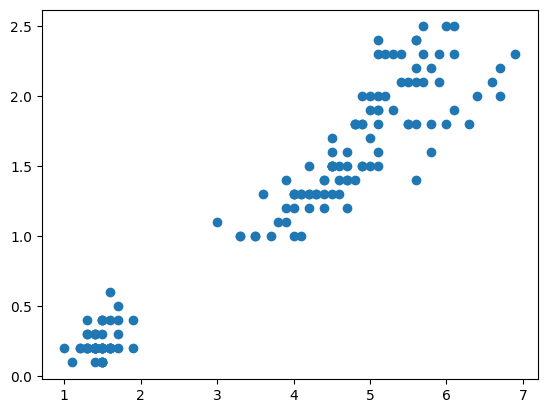

In [4]:
plt.scatter(X[:,0],X[:,1], label='True Position')

## Create Clusters

Take K = 3 so 3 clusters are formed and all data points are assigned in these three clusters

1. To create a K-means cluster with 3 clusters, Create a KMeans object and pass it 3 as value for n_clusters parameter.
2. Then call the fit method on kmeans and pass the data that you want to cluster, which in this case is the X array that we created earlier
3. The output y_kmeans is a one dimensional array of 150 elements corresponding to the clusters assigned to all 150 data points.


In [5]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


Centroid values the algorithm generated for the final clusters. The output will be an array of shape 3 x 2.

- cluster 1 - first row contains values for the coordinates of the first centroid location i.e. (4.26923077, 1.34230769 )
- cluster 2 - the second row contains 2nd centroid location (1.464, 0.244 ).
- cluster 3 - 3rd centroid location (5.59583333, 2.0375)


In [6]:
kmeans.cluster_centers_

array([[5.62608696, 2.04782609],
       [1.464     , 0.244     ],
       [4.29259259, 1.35925926]])

## Final Cluster Visualization

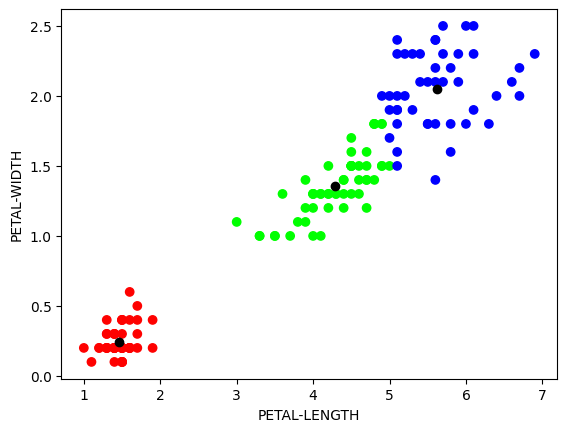

In [7]:
plt.scatter(X[:,0],X[:,1],c =y_kmeans, cmap ='brg')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('PETAL-LENGTH')
plt.ylabel('PETAL-WIDTH')
plt.show()